# QSO Cl's

In [1]:
# some_file.py
import sys
# insert at 1, 0 is the script path (or '' in REPL)

sys.path.insert(1, '/home/zcapjru/PhD/DEScls')

from xcell.mappers import MappereBOSSQSO
from xcell.mappers import MapperP15CMBK
from astropy.io import fits
from astropy.table import Table
import pyccl as ccl
import numpy as np
import pylab as plt
import pymaster as nmt
import healpy as hp

In [2]:
# Initialize binning scheme with 20 ells per bandpower
nside =  4096
nside_mask = 4096
#bands = nmt.NmtBin.from_nside_linear(nside, 20)
#ell_arr = bands.get_effective_ells()

In [3]:
ells = []
i = 11.5
while i <= 3 * nside:
    ells.append(round(i))
    #i = i*(1+i/(3 * nside))
    i = i+20*(1+i/240)
    
if ells[-1] <  3 * nside -1:   
    ells.append(3 * nside -1)
    
bands = nmt.NmtBin.from_edges(ells[:-1], ells[1:])
ell_arr = bands.get_effective_ells()

In [4]:
bands = nmt.NmtBin.from_edges(ells[:-1], ells[1:])
ell_arr = bands.get_effective_ells()

In [5]:
NGC_1_config = {'data_catalogs':['/home/zcapjru/PhD/Data/eBOSS_QSO/eBOSS_QSO_clustering_data-NGC-vDR16.fits'], 
          'random_catalogs':['/home/zcapjru/PhD/Data/eBOSS_QSO/eBOSS_QSO_clustering_random-NGC-vDR16.fits'],
          'z_edges':[0, 1.5],
          'nside':nside, 'nside_mask': nside_mask, 'mask_name': 'mask_QSO_NGC_1'
               }

NGC_2_config = {'data_catalogs':['/home/zcapjru/PhD/Data/eBOSS_QSO/eBOSS_QSO_clustering_data-NGC-vDR16.fits'], 
          'random_catalogs':['/home/zcapjru/PhD/Data/eBOSS_QSO/eBOSS_QSO_clustering_random-NGC-vDR16.fits'],
          'z_edges':[1.5, 3],
          'nside':nside, 'nside_mask': nside_mask, 'mask_name': 'mask_QSO_NGC_2'}

SGC_1_config = {'data_catalogs':['/home/zcapjru/PhD/Data/eBOSS_QSO/eBOSS_QSO_clustering_data-SGC-vDR16.fits'], 
          'random_catalogs':['/home/zcapjru/PhD/Data/eBOSS_QSO/eBOSS_QSO_clustering_random-SGC-vDR16.fits'],
          'z_edges':[0, 1.5],
          'nside':nside, 'nside_mask': nside_mask, 'mask_name': 'mask_QSO_SGC_1'}

SGC_2_config = {'data_catalogs':['/home/zcapjru/PhD/Data/eBOSS_QSO/eBOSS_QSO_clustering_data-SGC-vDR16.fits'], 
          'random_catalogs':['/home/zcapjru/PhD/Data/eBOSS_QSO/eBOSS_QSO_clustering_random-SGC-vDR16.fits'],
          'z_edges':[1.5, 3],
          'nside':nside, 'nside_mask': nside_mask, 'mask_name': 'mask_QSO_SGC_1'}

In [6]:
NGC_1_maps = MappereBOSSQSO(NGC_1_config)
NGC_2_maps = MappereBOSSQSO(NGC_2_config)
SGC_1_maps = MappereBOSSQSO(SGC_1_config)
SGC_2_maps = MappereBOSSQSO(SGC_2_config)

In [7]:
cosmo = ccl.Cosmology(Omega_c=0.27, Omega_b=0.049, h=0.67, sigma8=0.81, n_s=0.96)
b_ngc = 2.37*np.ones(50) 
b_sgc = 2.32 *np.ones(50) 

In [8]:
NGC_nz_1 = NGC_1_maps.get_nz()
NGC_nz_2 = NGC_2_maps.get_nz()
SGC_nz_1 = SGC_1_maps.get_nz()
SGC_nz_2 = SGC_2_maps.get_nz()

NGC_z_1 = NGC_nz_1[1]
NGC_dNdz_1 = NGC_nz_1[0]

NGC_z_2 = NGC_nz_2[1]
NGC_dNdz_2 = NGC_nz_2[0]

SGC_z_1 = SGC_nz_1[1]
SGC_dNdz_1 = SGC_nz_1[0]

SGC_z_2 = SGC_nz_2[1]
SGC_dNdz_2 = SGC_nz_2[0]

NGC_quasar1 = ccl.NumberCountsTracer(cosmo, has_rsd=False, dndz=(NGC_z_1,NGC_dNdz_1), bias=(NGC_z_1,b_ngc))
NGC_quasar2 = ccl.NumberCountsTracer(cosmo, has_rsd=False, dndz=(NGC_z_2,NGC_dNdz_2), bias=(NGC_z_2,b_ngc))
SGC_quasar1 = ccl.NumberCountsTracer(cosmo, has_rsd=False, dndz=(SGC_z_1,NGC_dNdz_1), bias=(SGC_z_1,b_sgc))
SGC_quasar2 = ccl.NumberCountsTracer(cosmo, has_rsd=False, dndz=(SGC_z_2,NGC_dNdz_2), bias=(SGC_z_2,b_sgc))
CMB_shear = ccl.CMBLensingTracer(cosmo, 1100)

In [9]:
#ell = np.arange(2, 2000)
NGC_theory_11 = ccl.angular_cl(cosmo, NGC_quasar1, NGC_quasar1, ell_arr) 
NGC_theory_12 = ccl.angular_cl(cosmo, NGC_quasar1, NGC_quasar2, ell_arr) 
NGC_theory_22 = ccl.angular_cl(cosmo, NGC_quasar2, NGC_quasar2, ell_arr) 

SGC_theory_11 = ccl.angular_cl(cosmo, SGC_quasar1, SGC_quasar1, ell_arr) 
SGC_theory_12 = ccl.angular_cl(cosmo, SGC_quasar1, SGC_quasar2, ell_arr) 
SGC_theory_22 = ccl.angular_cl(cosmo, SGC_quasar2, SGC_quasar2, ell_arr) 

In [10]:
def compute_cl(f_a, f_b, wsp):
    # Compute the power spectrum (a la anafast) of the masked fields
    # Note that we only use n_iter=0 here to speed up the computation,
    # but the default value of 3 is recommended in general.
    cl_coupled = nmt.compute_coupled_cell(f_a, f_b)
    # Decouple power spectrum into bandpowers inverting the coupling matrix
    #cl_decoupled = wsp.decouple_cell(cl_coupled) #removed bias here

    return cl_coupled

In [11]:
#NGC_f_1 =  NGC_1_maps.get_nmt_field()
#NGC_f_2 =  NGC_2_maps.get_nmt_field()

In [12]:
#SGC_f_1 =  SGC_1_maps.get_nmt_field()
#SGC_f_2 =  SGC_2_maps.get_nmt_field()

In [13]:
#NGC_w_11 = nmt.NmtWorkspace()
#NGC_w_11.compute_coupling_matrix(NGC_f_1, NGC_f_1, bands)
      
#NGC_w_12 = nmt.NmtWorkspace()
#NGC_w_12.compute_coupling_matrix(NGC_f_1, NGC_f_2, bands)

#NGC_w_22 = nmt.NmtWorkspace()
#NGC_w_22.compute_coupling_matrix(NGC_f_2, NGC_f_2, bands)

In [14]:
#SGC_w_11 = nmt.NmtWorkspace()
#SGC_w_11.compute_coupling_matrix(SGC_f_1, SGC_f_1, bands)

#SGC_w_12 = nmt.NmtWorkspace()
#SGC_w_12.compute_coupling_matrix(SGC_f_1, SGC_f_2, bands)

#SGC_w_22 = nmt.NmtWorkspace()
#SGC_w_22.compute_coupling_matrix(SGC_f_2, SGC_f_2, bands)

In [15]:
#NGC_cl_11 = compute_cl(NGC_f_1, NGC_f_1, NGC_w_11)
#NGC_cl_12 = compute_cl(NGC_f_1, NGC_f_2, NGC_w_12)
#NGC_cl_22 = compute_cl(NGC_f_2, NGC_f_2, NGC_w_22)

In [16]:
#SGC_cl_11 = compute_cl(SGC_f_1, SGC_f_1, SGC_w_11)
#SGC_cl_12 = compute_cl(SGC_f_1, SGC_f_2, SGC_w_12)
#SGC_cl_22 = compute_cl(SGC_f_2, SGC_f_2, SGC_w_22)

In [17]:
NGC_nl_11 = NGC_1_maps.get_nl_coupled() 
#NGC_nl_22 = NGC_2_maps.get_nl_coupled() 

calculating nl from mean cl values


/home/zcapjru/anaconda3/envs/PhD/lib/python3.8/site-packages/healpy/pixelfunc.py:475: RuntimeWarning: invalid value encountered in _ang2pix_ring
  return pixlib._ang2pix_ring(nside, theta, phi)


[1.88859064e-06 1.37368678e-06 7.73257466e-07 ... 1.25354375e-11
 1.24876738e-11 1.23973528e-11]
1.254032622434838e-11


In [18]:
#SGC_nl_11 = SGC_1_maps.get_nl_coupled() 
#SGC_nl_22 = SGC_2_maps.get_nl_coupled() 

In [19]:
#N_cl_11 = NGC_w_11.decouple_cell(NGC_cl_11) - NGC_w_11.decouple_cell(NGC_nl_11)
#N_cl_22 = NGC_w_11.decouple_cell(NGC_cl_22) - NGC_w_22.decouple_cell(NGC_nl_22)

In [20]:
#S_cl_11 = SGC_w_11.decouple_cell(SGC_cl_11) - SGC_w_11.decouple_cell(SGC_nl_11)
#S_cl_22 = SGC_w_22.decouple_cell(SGC_cl_22) - SGC_w_22.decouple_cell(SGC_nl_22)

In [21]:
translate = {
    'NGC': 'N',
    'SGC': 'S',
    '0': 'l',
    '1': 'h'   
}

In [22]:
def load_david_cl(cup, a):
    cup = translate[cup]
    a = translate[a]
    return np.load('/home/zcapjru/PhD/Data/David_eBOSS/cls_{}{}_ns4096.npz'.format(cup, a))
def load_jaime_cl(cup, a):
    return np.loadtxt('/home/zcapjru/PhD/Cls/eBOSSQSO/4096/4096_{}_cl_{}{}.txt'.format(cup, a, a))
def load_jaime_nl(cup, a):
    return np.loadtxt('/home/zcapjru/PhD/Cls/eBOSSQSO/4096/4096_{}_nl_{}{}.txt'.format(cup, a, a))

In [23]:
NGC_nl_11[0]

array([1.25403262e-11, 1.25403262e-11, 1.25403262e-11, ...,
       1.25403262e-11, 1.25403262e-11, 1.25403262e-11])

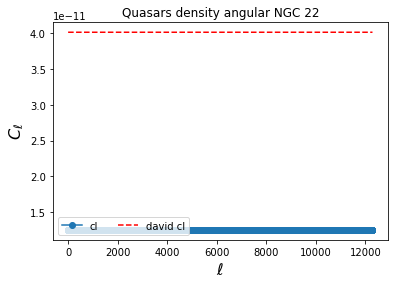

In [33]:
plt.plot( NGC_nl_11[0], 'o-', label='cl')
plt.plot(load_david_cl('NGC', '1')['nl_coupled'][0], 'r--', label='david cl')
#plt.loglog()
plt.title('Quasars density angular NGC 22')
plt.xlabel('$\\ell$', fontsize=16)
plt.ylabel('$C_\\ell$', fontsize=16)
plt.legend(loc='lower left', ncol=2, labelspacing=0.1)
plt.show()

In [25]:
cups = ['NGC', 'SGC']
for cup in cups:
    for i in range(2):
            david_ii = load_david_cl(cup,str(i))['cl'][0] - load_david_cl(cup,str(i))['nl'][0]
            jaime_ii = load_jaime_cl(cup,i)
            jaime_ii = jaime_ii - load_jaime_nl(cup,i)
            diff = abs(david_ii - jaime_ii)
            print('for {}_{}{} the max error is {}'.format(cup, i , i, max(diff)))

for NGC_00 the max error is 5.590417451878382e-20
for NGC_11 the max error is 6.098637220230962e-20
for SGC_00 the max error is 7.758821796849391e-19
for SGC_11 the max error is 1.2027867851011065e-19


In [26]:
load_david_cl('NGC', '1')['nl_coupled'][0]
#(ells > 2000) & (ells < 8000)

array([4.01251396e-11, 4.01251396e-11, 4.01251396e-11, ...,
       4.01251396e-11, 4.01251396e-11, 4.01251396e-11])

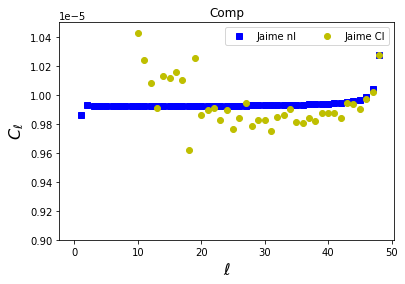

In [27]:
plt.plot( load_jaime_nl('SGC', 0) , 'bs', label='Jaime nl')
plt.plot( load_jaime_cl('SGC', 0) , 'yo', label='Jaime Cl')
#plt.semilogx()
plt.title('Comp')
plt.xlabel('$\\ell$', fontsize=16)
plt.ylabel('$C_\\ell$', fontsize=16)
plt.legend(loc='upper right', ncol=2, labelspacing=0.1)
plt.ylim([9e-6, 1.05e-5])
plt.show()

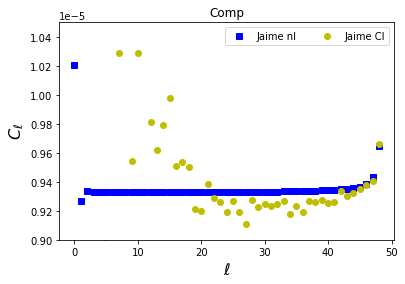

In [28]:
plt.plot( load_jaime_nl('SGC', 1) , 'bs', label='Jaime nl')
plt.plot( load_jaime_cl('SGC', 1) , 'yo', label='Jaime Cl')
#plt.semilogx()
plt.title('Comp')
plt.xlabel('$\\ell$', fontsize=16)
plt.ylabel('$C_\\ell$', fontsize=16)
plt.legend(loc='upper right', ncol=2, labelspacing=0.1)
plt.ylim([9e-6, 1.05e-5])
plt.show()

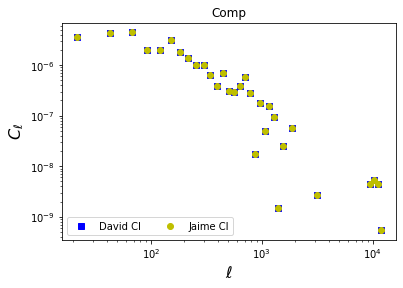

In [29]:
plt.plot(ell_arr, load_david_cl('NGC', '1')['cl'][0]-  load_david_cl('NGC', '1')['nl'][0], 'bs', label='David Cl')
plt.plot(ell_arr, load_jaime_cl('NGC', 1) - load_jaime_nl('NGC',1) , 'yo', label='Jaime Cl')
plt.loglog()
plt.title('Comp')
plt.xlabel('$\\ell$', fontsize=16)
plt.ylabel('$C_\\ell$', fontsize=16)
plt.legend(loc='lower left', ncol=2, labelspacing=0.1)
plt.show()

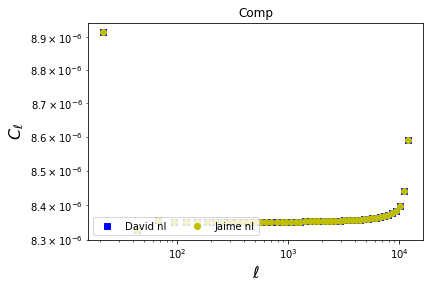

In [30]:
plt.plot(ell_arr,   load_david_cl('NGC', '1')['nl'][0], 'bs', label='David nl')
plt.plot(ell_arr,  load_jaime_nl('NGC',1) , 'yo', label='Jaime nl')
plt.loglog()
plt.title('Comp')
plt.xlabel('$\\ell$', fontsize=16)
plt.ylabel('$C_\\ell$', fontsize=16)
plt.legend(loc='lower left', ncol=2, labelspacing=0.1)
plt.show()

In [31]:
load_david_cl('NGC', '1')['ls']

array([   21.5,    43. ,    67. ,    92.5,   120. ,   150.5,   183. ,
         218. ,   256.5,   298. ,   343. ,   391.5,   444. ,   501. ,
         563. ,   630. ,   702.5,   781. ,   866. ,   958.5,  1058.5,
        1166.5,  1283.5,  1410.5,  1548. ,  1697. ,  1858.5,  2033.5,
        2223. ,  2428.5,  2651. ,  2892. ,  3153. ,  3435.5,  3742. ,
        4074. ,  4433.5,  4823. ,  5245. ,  5702. ,  6197.5,  6734. ,
        7315. ,  7945. ,  8627. ,  9366. , 10166.5, 11033.5, 11885.5])

In [32]:
ell_arr

array([   21.5,    43. ,    67. ,    92.5,   120. ,   150.5,   183. ,
         218. ,   256.5,   298. ,   343. ,   391.5,   444. ,   501. ,
         563. ,   630. ,   702.5,   781. ,   866. ,   958.5,  1058.5,
        1166.5,  1283.5,  1410.5,  1548. ,  1697. ,  1858.5,  2033.5,
        2223. ,  2428.5,  2651. ,  2892. ,  3153. ,  3435.5,  3742. ,
        4074. ,  4433.5,  4823. ,  5245. ,  5702. ,  6197.5,  6734. ,
        7315. ,  7945. ,  8627. ,  9366. , 10166.5, 11033.5, 11885.5])